In [3]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, '..')
from lib import utils

db = utils.DB()


In [66]:
from pathlib import Path

p=Path(r"Y:\FVC Fingerprint Datasets\FVC2002\Dbs\DB1_B\106_1.tif")

In [67]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(p.as_posix())

In [68]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [69]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
# cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

In [70]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

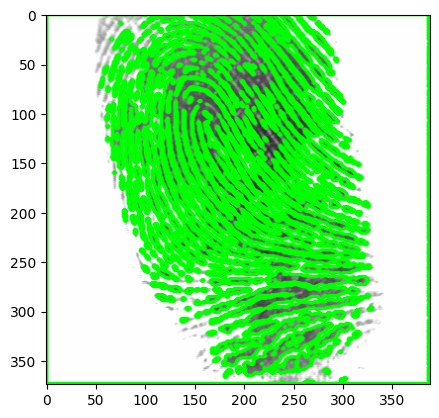

In [71]:
plt.imshow(image_copy)

In [72]:
"""
Now let's try with `cv2.CHAIN_APPROX_SIMPLE`
"""
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('Simple approximation', image_copy1)
cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)
cv2.destroyAllWindows()